<a href="https://colab.research.google.com/github/Karunakarbugide/credit_default_risk_analysis/blob/main/Credit_Default_Risk_Analysis___its_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Table of Contents**

1. [Introduction](#Section1)<br>
2. [Problem Statement](#Section2)<br>
3. [Installing & Importing Libraries](#Section3)<br>
4. [Data Acquisition & Description](#Section4)<br>
5. [Data Pre-processing](#Section5)<br>
6. [Exploratory Data Analysis](#Section6)<br>
7. [Post Data Processing & Feature Selection](#Section7)<br>
8. [Model Development & Evaluation](#Section8)<br>
  8.1 [Baseline Models](#Section81)<br>
    - 8.1.1 [Logistic Regression](#Section811)<br>
    - 8.1.2 [Random Forest Classifier](#Section812)<br>
    - 8.1.3 [Extreme Gradient Boosting Classifier](#Section813)<br>
      
  8.2 [Oversampling Models](#Section82)<br>
    - 8.1.1 [Logistic Regression](#Section821)<br>
    - 8.1.2 [Random Forest Classifier](#Section822)<br>
    - 8.1.3 [Extreme Gradient Boosting Classifier](#Section823)<br>
9. [Conclusion](#Section9)<br>


<a id = Section1></a>
# **1. Introduction**

According to the <a href = "https://www.newyorkfed.org/medialibrary/interactives/householdcredit/data/pdf/HHDC_2019Q3.pdf">CMD's latest Quarterly Report</a> on Household Debt and Credit reveals that total household debt has **increased by $\$$92 billion** to **$\$$13.95 trillion** in the **third quarter** of **2019**. It was the **twenty-first consecutive quarterly** **increase**, and the total is now  **$\$$1.3 trillion higher**, in nominal terms, than the previous peak of  $\$$12.68 trillion in the third quarter of 2008. Non-housing balances increased by **$\$$64 billion** in the third quarter, with increases across the board, including **$\$$18 billion** in auto loans, **$\$$13 billion** in credit card balances, and **$\$$20 billion** in student loans.

<center><img src="https://raw.githubusercontent.com/insaid2018/Domain_Case_Studies/master/Finance/loan%203.png"></center>




# **2. Problem Statement**

**The process of issuing loans has increased in complexity over the years due to the different possibilities, market demands and clients’ circumstances.** Many people struggle to get loans due to insufficient or non-existent credit histories. And, unfortunately, this population is often taken advantage of by treacherous lenders. This has made banks a highly regulated entity which is expected to act responsively while providing loans.

<center><img src="https://raw.githubusercontent.com/insaid2018/Domain_Case_Studies/master/Finance/loan2.png"></center>

**<h3>Scenario:</h3>** 

**IndNatBank** is a peer to peer loan financial company who provides loan to its potential customers all over the India. They make profit based on the **risk** they issues loans to the borrowers. Based on the previous data they want to analyze the risk of issuing loans to the new customers which at the same time also helps to **improve the personalization user experience while applying for loans.**

They have experienced employees who uses the complex rules to provide services to their customers. **But as the size of data will increase their traditional ways of assessing risk might not be good for the company**. They wants to **automate their process by which machine learns the pattern out of their data for better customer experience.**

Now the question is how this problem could be solved using Machine Learning? While there are many ways to assess the credit loan risk and its depiction. We will be working with a simple scenario to solve this problem.

The **target feature** in the acquired data set is **is_default** and it's values are:

|Target Feature|Potential Values|
| :-- | :-- |
|**is_default**|0: Not default|
||1: Default|

<a id = Section3></a>
# **3. Installing & Importing Libraries**

### **Installing Libraries**

In [1]:
!pip install -q datascience                   # Package that is required by pandas profiling
!pip install -q pandas-profiling              # Library to generate basic statistics about data
!pip install -q yellowbrick                   # A visualization library for Machine Learning

     |████████████████████████████████| 69 kB 2.9 MB/s 


### **Upgrading Libraries**

**Note:** After upgrading, you need to restart the runtime. Make sure not to execute the cell again after restarting the runtime.

In [2]:
!pip install -q --upgrade pandas-profiling 

     |████████████████████████████████| 248 kB 4.3 MB/s 
     |████████████████████████████████| 636 kB 42.3 MB/s 
     |████████████████████████████████| 62 kB 823 kB/s 
     |████████████████████████████████| 675 kB 24.0 MB/s 
     |████████████████████████████████| 3.1 MB 36.8 MB/s 
     |████████████████████████████████| 102 kB 49.4 MB/s 
     |████████████████████████████████| 10.1 MB 22.8 MB/s 
     |████████████████████████████████| 812 kB 40.4 MB/s 
     |████████████████████████████████| 28.5 MB 46 kB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.26.0 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


### **Importing Libraries**

In [3]:
# For Panel Data Analysis
import pandas as pd
from pandas_profiling import ProfileReport
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('mode.chained_assignment', None)

# For Numerical Python
import numpy as np

# For Random seed values
from random import randint

# For Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# For Scientific Computation
from scipy import stats

# For Preprocessing & Scaling
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler

# For Feature Selection
from sklearn.feature_selection import SelectFromModel

# For Data Modeling and Evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier

# For Machine Learning Model Evaluation
from sklearn.metrics import classification_report
from yellowbrick.classifier import PrecisionRecallCurve
from xgboost import to_graphviz, plot_importance

# To handle class imbalance problem
from imblearn.over_sampling import SMOTE

# To Disable Warnings
import warnings
warnings.filterwarnings(action = "ignore")

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported f

<a id=Section4></a>
# **4. Data Acquisition & Description**

We have extracted the data, **year(2007-2015),** of **customer being defaulter** and it can be retrieved from the <a href="https://storage.googleapis.com/industryanalytics/LoanDefaultData.csv">link</a>.

| Records | Features | Dataset Size |
| :-- | :-- | :-- |
| 8,87,379 | 22 | 131 MB|

| Id | Features | Description |
| :--| :--| :--|
|01|**cust_id**|Unique ID of customer|
|02|**year**|Loan Applied Year|
|03|**state**|State where loan was approved|
|04|**date_issued**|Date when loan was issued|
|05|**date_final**|Final date of loan payment|
|06|**emp_duration**|Employment duration(in years). Range=[0, 10] , where 0 indicates < 1 year and 10 indicates >=10 years|
|07|**own_type**|A status provided by the borrower during registration.  Possible values are MORTGAGE, OTHER, NONE, ANY, RENT, OWN|
|08|**income_type**|Income categorization of customer. Possible values are Low, Medium, High|
|09|**app_type**|Signifies whether the loan is an individual application or a joint application|
|10|**loan_purpose**|Signifies the requirement of loan|
|11|**interest_payments**|Signifies the type of interest payments, categorized under Low and High|
|12|**grade**|Assigned loan grade by the company|
|13|**annual_pay**|Annual salary of the customer|
|14|**loan_amount**|Loan amount required by the customer|
|15|**interest_rate**|Interest rate on the lent money|
|16|**loan_duration**|Loan repayment duration in months(36 or 60)|
|17|**dti**|Debt-to-Income(DTI) is the percentage of a consumer's monthly gross income that goes toward paying debts.|
|18|**total_pymnt**|Total amount that has been paid so far|
|19|**total_rec_prncp**| Total recoverd principal amount so far|
|20|**recoveries**|Amount that has yet to recover|
|21|**installment**|Monthly payment owed by the borrower|
|22|**is_default**|Customer been default or not|


In [4]:
LINK = 'https://storage.googleapis.com/industryanalytics/LoanDefaultData.csv'

def load_default_data(link = LINK):
  return pd.read_csv(filepath_or_buffer = link)

In [5]:
data = load_default_data()
print('Data Shape:', data.shape)
data.head()

Data Shape: (887379, 22)


,cust_id,year,state,date_issued,date_final,emp_duration,own_type,income_type,app_type,loan_purpose,interest_payments,grade,annual_pay,loan_amount,interest_rate,loan_duration,dti,total_pymnt,total_rec_prncp,recoveries,installment,is_default
0,180675,2007,Andhra Pradesh,01/12/2007,1032009,10.0,MORTGAGE,Low,INDIVIDUAL,debt_consolidation,Low,C,73000,25000,10.91,36 months,22.13,13650.38,8767.32,2207.65,817.41,1
1,85781,2007,Rajasthan,01/06/2007,1072010,0.5,RENT,Low,INDIVIDUAL,other,Low,C,40000,1400,10.91,36 months,8.61,1663.04,1400.00,0.00,45.78,0
2,85675,2007,Manipur,01/06/2007,1062010,10.0,RENT,Low,INDIVIDUAL,other,High,E,25000,1000,14.07,36 months,16.27,1231.38,1000.00,0.00,34.21,0
3,84918,2007,Andhra Pradesh,01/09/2007,1042008,10.0,MORTGAGE,Low,INDIVIDUAL,other,Low,A,65000,5000,7.43,36 months,0.28,5200.44,5000.00,0.00,155.38,0
4,84670,2007,Arunachal Pradesh,01/06/2007,1082009,10.0,MORTGAGE,High,INDIVIDUAL,other,Low,A,300000,5000,7.75,36 months,5.38,5565.65,5000.00,0.00,156.11,0


### **Data Description**

In this section we will **get information about the data** and **analyze** some **observations**.

In [6]:
print('Describe Feature Length:', len(data.describe().columns))
data.describe()

Describe Feature Length: 13


,cust_id,year,date_final,emp_duration,annual_pay,loan_amount,interest_rate,dti,total_pymnt,total_rec_prncp,recoveries,installment,is_default
count,8.873790e+05,887379.000000,8.873790e+05,887379.000000,8.873790e+05,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000
mean,3.246513e+07,2014.021761,1.047089e+06,6.050564,7.502759e+04,14755.264605,13.246740,18.157039,7558.826684,5757.706424,45.919243,436.717127,0.075987
std,2.282734e+07,1.261741,4.555149e+04,3.507405,6.469815e+04,8435.455601,4.381867,17.190626,7871.243336,6625.441046,409.693874,244.186593,0.264977
min,5.473400e+04,2007.000000,1.012008e+06,0.500000,0.000000e+00,500.000000,5.320000,0.000000,0.000000,0.000000,0.000000,15.670000,0.000000
25%,9.206643e+06,2013.000000,1.012016e+06,3.000000,4.500000e+04,8000.000000,9.990000,11.910000,1914.590000,1200.570000,0.000000,260.705000,0.000000
50%,3.443327e+07,2014.000000,1.012016e+06,6.050000,6.500000e+04,13000.000000,12.990000,17.650000,4894.999117,3215.320000,0.000000,382.550000,0.000000
75%,5.490814e+07,2015.000000,1.092015e+06,10.000000,9.000000e+04,20000.000000,16.200000,23.950000,10616.814230,8000.000000,0.000000,572.600000,0.000000
max,6.861706e+07,2015.000000,1.122015e+06,10.000000,9.500000e+06,35000.000000,28.990000,9999.000000,57777.579870,35000.030000,33520.270000,1445.460000,1.000000


**Observation:**

- **50% of employees have 6 years** of **employment duration** which is **almost same for average employees** as **indicated by** the **mean** and **50%** values.
- The **average annual pay** of the **employee** is **$\$$75027.59 dollars** and **$\$$18.15 amount of consumer's monthly gross income goes towards paying debts**.
- The **average loan amount required** by the **applicant** is **$\$$14755.26 dollars**.
- The **average interst rate** on **average loan amount** is **13.24%**.
- On **average $\$$7558.82 dollars amount of money has been paid** so far while **$\$$409.69 dollars amount has yet to be retrieved**.
- **75% of applicants have paid their debt** as indicated by recoveries = 0.

### **Data Information:**

In this section we will see the **information about features i.e. types, count and null?**.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   cust_id            887379 non-null  int64  
 1   year               887379 non-null  int64  
 2   state              887379 non-null  object 
 3   date_issued        887379 non-null  object 
 4   date_final         887379 non-null  int64  
 5   emp_duration       887379 non-null  float64
 6   own_type           887379 non-null  object 
 7   income_type        887379 non-null  object 
 8   app_type           887379 non-null  object 
 9   loan_purpose       887379 non-null  object 
 10  interest_payments  887379 non-null  object 
 11  grade              887379 non-null  object 
 12  annual_pay         887379 non-null  int64  
 13  loan_amount        887379 non-null  int64  
 14  interest_rate      887379 non-null  float64
 15  loan_duration      887379 non-null  object 
 16  dt

**Observation:**

- It turns out that **all features contains 887379 values**.
- **date_issued** and **date_final** are categorized as incorrect types.

### **Numerical Data Distribution:**

- We shall plot all **numerical features to analyze the distribution** of their past.

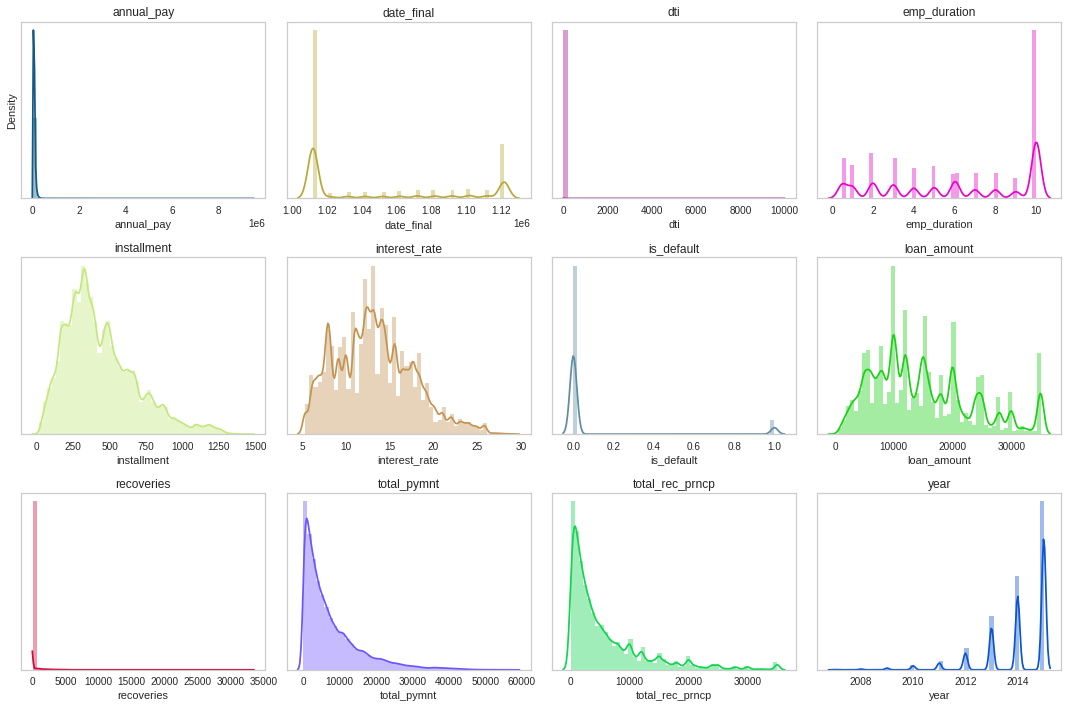

In [8]:
fig, axes = plt.subplots(nrows = 3, ncols = 4, sharex = False, figsize=(15, 10))
colors = []
for i in range(12):
  colors.append('#%06X' % randint(0, 0xFFFFFF))
columns = ['annual_pay', 'date_final', 'dti', 'emp_duration', 'installment', 'interest_rate', 'is_default',
           'loan_amount', 'recoveries', 'total_pymnt', 'total_rec_prncp', 'year']
for ax, col, color in zip(axes.flat, columns, colors):
  sns.distplot(a = data[col], bins = 50, ax = ax, color = color)
  ax.set_title(col)
  plt.setp(axes, yticks=[])
  ax.grid(False)
plt.tight_layout()
plt.show()

**Observation:**

- **Postive Skewed Features: (Mean > Median)**
 - annual_pay,
 - dti, 
 - installment, 
 - loan_amount, 
 - recoveries, 
 - totoal_pymnt, 
 - total_rec_prncp
- **Negative Skewed Features: (Mean < Median)**
 - year
- **~ Normally Distributed Features: (Mean = Median = Mode)**
 - emp_duration, 
 - interest_rate

### **Categorical Data Distribution:**

- We shall plot all **categorical features to analyze the distribution** of the past data.
- **Firstly we will extract all the categorical features**.
- We **remove date_issued** because we won't be using time series to predict the classes and eventually will get removed at later stage.

In [9]:
# Extracting all the categorical features
cat_list = []
for i in data.columns.values:
  if (data[i].dtype == 'object'):
    cat_list.append(i)
    
# Excluding date_issued feature    
cat_list.remove('date_issued')

print('Total Categorical Features:', len(cat_list))
print("Categorical Features", cat_list)

Total Categorical Features: 8
Categorical Features ['state', 'own_type', 'income_type', 'app_type', 'loan_purpose', 'interest_payments', 'grade', 'loan_duration']


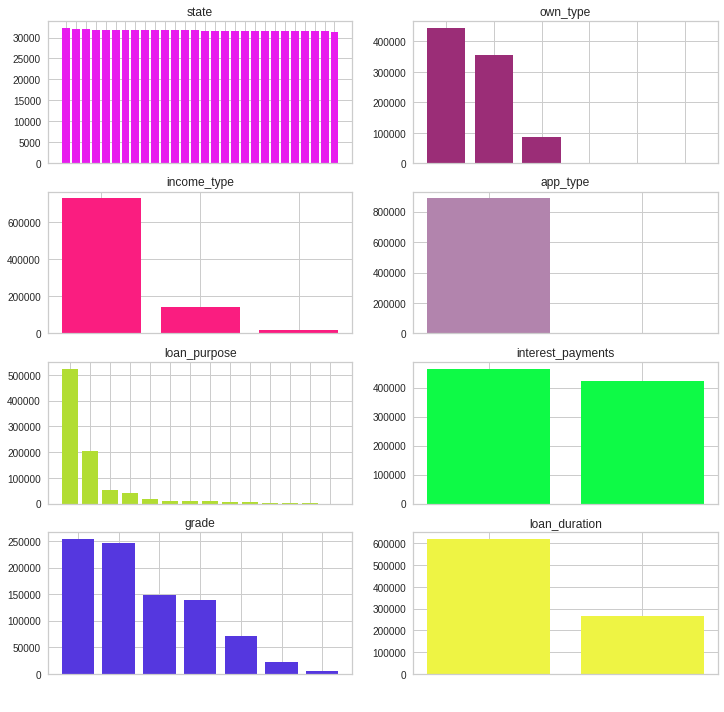

In [10]:
fig, axes = plt.subplots(nrows = 4, ncols = 2, sharex = False, figsize=(12, 12))

colors = []
for i in range(8):
  colors.append('#%06X' % randint(0, 0xFFFFFF))
  
for ax, col, color in zip(axes.flat, cat_list, colors):
  ax.bar(x = data[col].value_counts().index, height = data[col].value_counts(), color = color)
  ax.set_title(col)
  ax.set_xlabel(' ')
  ax.set_xticklabels(labels = ' ')
  ax.grid(True)

**Observation:**

- **Normal Distributed Features: (Mean = Median = Mode)**
 - state, 
 - interest_payments, 
 - app_type
- **Postively Skewed Features: (Mean > Median)**
 - own_type, 
 - income_type, 
 - loan_purpose, 
 - grade,
 - loan_duration
- **Negatively Skewed Features: (Mean < Median)**
 - NA

### **Pre-Profiling Report**

In [ ]:
# profile = ProfileReport(df = data)
# profile.to_file(output_file = 'Pre Profiling Report.html')
# print('Accomplished!')

Accomplished!


**Observation:**

- Profiling identified **10 numeric, 9 categorical, 1 boolean and 2 rejected features**.
- **date_issued** is found to be **cardinal with 103 distinct values**.
- **annual_pay, dti** is found to be **highy skewed**.
- **total_pymnt** is found to **have 2% of zeros** present **while recoveries having 97.2% of zeros**.
- **total_rec_prncp** is **highly correlated** with **total_pymnt** while **installment** is **highly correlated** with **loan_amount**.
- **cust_id** is **highly correlated** with **year** feature.

<a id = Section5></a>
# **5. Data Pre-Processing**

### **Identification & Handling of Inconsistent Data Types**

**Before changes: Respective Data Type per Feature**

In [11]:
data.head()

,cust_id,year,state,date_issued,date_final,emp_duration,own_type,income_type,app_type,loan_purpose,interest_payments,grade,annual_pay,loan_amount,interest_rate,loan_duration,dti,total_pymnt,total_rec_prncp,recoveries,installment,is_default
0,180675,2007,Andhra Pradesh,01/12/2007,1032009,10.0,MORTGAGE,Low,INDIVIDUAL,debt_consolidation,Low,C,73000,25000,10.91,36 months,22.13,13650.38,8767.32,2207.65,817.41,1
1,85781,2007,Rajasthan,01/06/2007,1072010,0.5,RENT,Low,INDIVIDUAL,other,Low,C,40000,1400,10.91,36 months,8.61,1663.04,1400.00,0.00,45.78,0
2,85675,2007,Manipur,01/06/2007,1062010,10.0,RENT,Low,INDIVIDUAL,other,High,E,25000,1000,14.07,36 months,16.27,1231.38,1000.00,0.00,34.21,0
3,84918,2007,Andhra Pradesh,01/09/2007,1042008,10.0,MORTGAGE,Low,INDIVIDUAL,other,Low,A,65000,5000,7.43,36 months,0.28,5200.44,5000.00,0.00,155.38,0
4,84670,2007,Arunachal Pradesh,01/06/2007,1082009,10.0,MORTGAGE,High,INDIVIDUAL,other,Low,A,300000,5000,7.75,36 months,5.38,5565.65,5000.00,0.00,156.11,0


In [12]:
# Dataframe before performing changes
type_frame = pd.DataFrame(data = data.dtypes, columns = ['Type'])
type_frame.transpose()

,cust_id,year,state,date_issued,date_final,emp_duration,own_type,income_type,app_type,loan_purpose,interest_payments,grade,annual_pay,loan_amount,interest_rate,loan_duration,dti,total_pymnt,total_rec_prncp,recoveries,installment,is_default
Type,int64,int64,object,object,int64,float64,object,object,object,object,object,object,int64,int64,float64,object,float64,float64,float64,float64,float64,int64


**Observation:**

- Following **features** contain **inconsitent data type**. A **symbol** &rarr; represents **will be changed to**:
  - **Feature** [ **Current Type** &rarr; **Desired Type** ]
  - date_issued [ Object &rarr; Datetime ]
  - date_final [ Object &rarr; Datetime ]
  - is_default [ int &rarr; Boolean ]

**Performing Correction**

In [13]:
# Correcting types of features
data['date_issued'] = pd.to_datetime(data['date_issued'])
data['date_final'] = pd.to_datetime(data['date_final'], format = '%d%m%Y')
data['is_default'] = data['is_default'].astype(bool)

**After changes: Respective Data Type per Feature**

In [14]:
# Dataframe after performing changes
type_frame = pd.DataFrame(data = data.dtypes, columns = ['Type'])
type_frame.transpose()

,cust_id,year,state,date_issued,date_final,emp_duration,own_type,income_type,app_type,loan_purpose,interest_payments,grade,annual_pay,loan_amount,interest_rate,loan_duration,dti,total_pymnt,total_rec_prncp,recoveries,installment,is_default
Type,int64,int64,object,datetime64[ns],datetime64[ns],float64,object,object,object,object,object,object,int64,int64,float64,object,float64,float64,float64,float64,float64,bool


### **Identification & Handling of Missing Data**

#### **Null Data Identification & Handling**

In [ ]:
print('Data Shape:', data.shape)
null_frame = pd.DataFrame()
null_frame['Features'] = data.columns.values
null_frame['Null Frequency'] = data.isnull().sum().values
null_frame['Missing %age'] = np.round(null_frame['Null Frequency']/data.shape[0], decimals = 4) * 100
null_frame.set_index('Features', inplace = True)
null_frame.transpose()

Data Shape: (887379, 22)


Features,cust_id,year,state,date_issued,date_final,emp_duration,own_type,income_type,app_type,loan_purpose,interest_payments,grade,annual_pay,loan_amount,interest_rate,loan_duration,dti,total_pymnt,total_rec_prncp,recoveries,installment,is_default
Null Frequency,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Missing %age,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Observation:**

- It turns out that **there aren't any null values present** in our data.

#### **Zero Data Identification**

**Before Handling Zero Data**

In [15]:
print('Data Shape:', data.shape)
null_frame = pd.DataFrame()
null_frame['Features'] = data.columns.values
null_frame['Zeros Frequency'] = data[data == 0].count().values
null_frame['Missing %age'] = np.round(null_frame['Zeros Frequency']/data.shape[0], decimals = 5) * 100
null_frame.set_index('Features', inplace = True)
null_frame.transpose()

Data Shape: (887379, 22)


Features,cust_id,year,state,date_issued,date_final,emp_duration,own_type,income_type,app_type,loan_purpose,interest_payments,grade,annual_pay,loan_amount,interest_rate,loan_duration,dti,total_pymnt,total_rec_prncp,recoveries,installment,is_default
Zeros Frequency,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,451.000,17759.000,18145.000,862702.000,0.0,819950.000
Missing %age,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.051,2.001,2.045,97.219,0.0,92.401


**Observation:**

- **Feature**  [ **Missing Ratio** ] &rarr; **Action to be taken**
  - annual_pay [ ~0% ] &rarr; Drop data rows
  - dti [ 0.05% ] &rarr; Replace with median dti
  - total_pymnt [ 2% ] &rarr; No action
  - total_rec_prncp [ 2% ] &rarr; No action
  - recoveries [ 97% ] &rarr; No action
  - is_default [ 92% ] &rarr; No action

**Performing Operations**

In [16]:
# Dropping two records containing annual_pay = 0
data = data[data['annual_pay'] != 0]

# Replacing dti feature containing NaN values with median values
data['dti'] = data['dti'].replace(0, np.median(data['dti']))

print('Accomplished!')

Accomplished!


**After Handling Zero Data**

In [17]:
# Verifying changes over operation applied on data
print('Data Shape:', data.shape)
null_frame = pd.DataFrame()
null_frame['Features'] = data.columns.values
null_frame['Zeros Frequency'] = data[data == 0].count().values
null_frame['Missing %age'] = np.round(null_frame['Zeros Frequency']/data.shape[0], decimals = 5) * 100
null_frame.set_index('Features', inplace = True)
null_frame.transpose()

Data Shape: (887377, 22)


Features,cust_id,year,state,date_issued,date_final,emp_duration,own_type,income_type,app_type,loan_purpose,interest_payments,grade,annual_pay,loan_amount,interest_rate,loan_duration,dti,total_pymnt,total_rec_prncp,recoveries,installment,is_default
Zeros Frequency,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17759.000,18145.000,862700.000,0.0,819948.000
Missing %age,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.001,2.045,97.219,0.0,92.401


### **Identification & Handling of Duplicate Rows**

- Now we will **identify the duplicacity in records and if present**, **we will drop it**. 
- We are **making a copy of data** on which we will work on **so that our original data is intact from harm** and **after identifying** we **can perfrom the same operation on our original data**. 
- We'll **drop cust_id** to identify whether there are **duplicate rows** present in our data or not.

In [18]:
data2 = data.copy()

In [19]:
# Dropping cust_id as it is unique
data2 = data2.drop('cust_id', axis = 1)
print('Drop Success!')

Drop Success!


In [20]:
print('Contains Duplicate Rows?', data2.duplicated().any())

Contains Duplicate Rows? False


**Observation:**

- It turns out that **there aren't any duplicate rows** present in our data.

### **Identification & Handling of Duplicate Columns**

- Below we have **made a custom function to identify duplicate columns containing duplicate values**.

In [21]:
def duplicateCols(dataframe):
  '''Returns a list of labels of duplicate valued columns'''
  names = set()
  for i in range(dataframe.shape[1]):
    col1 = dataframe.iloc[:, i]
    for j in range(i+1, dataframe.shape[1]):
      col2 = dataframe.iloc[:, j]
      if col1.equals(col2):
        names.add(dataframe.columns.values[j])

  if (len(names) == 0):
    return None
  else:
    return list(names)

# Making a call over copy of data
is_duplicate_cols = duplicateCols(data2)
print('Contains Duplicate Columns?', is_duplicate_cols)

Contains Duplicate Columns? None


**Observation:**

- From the above, it can be seen that **there are no duplicate columns present** in our data.

### **Post Profiling Report**

In [ ]:
#profile = ProfileReport(df = data)
#profile.to_file(output_file = 'Post Profiling Report.html')
#print('Accomplished!')

**Observation:**

 - There are: **Numeric = 9**, **Categorical = 8**, **Boolean = 1**, **Date = 2** features.
 - **annual_pay**, **dti** are **highly skewed**.
 - **total_pymnt have 2% of zeros signifying 2% of people haven't paid any money**.
 - **total_rec_prncp is highly correlated with total_pymnt**,
 installment is highly correlated with loan_amount & should be ignored for analysis.
 - **recoveries has 97.2% zeros signifying around 97% of people have paid their debt.**


<a id = Section6></a>
# **6. Exploratory Data Analysis**

In [22]:
print('Data Shape:', data.shape)
data.head()

Data Shape: (887377, 22)


,cust_id,year,state,date_issued,date_final,emp_duration,own_type,income_type,app_type,loan_purpose,interest_payments,grade,annual_pay,loan_amount,interest_rate,loan_duration,dti,total_pymnt,total_rec_prncp,recoveries,installment,is_default
0,180675,2007,Andhra Pradesh,2007-01-12,2009-03-10,10.0,MORTGAGE,Low,INDIVIDUAL,debt_consolidation,Low,C,73000,25000,10.91,36 months,22.13,13650.38,8767.32,2207.65,817.41,True
1,85781,2007,Rajasthan,2007-01-06,2010-07-10,0.5,RENT,Low,INDIVIDUAL,other,Low,C,40000,1400,10.91,36 months,8.61,1663.04,1400.00,0.00,45.78,False
2,85675,2007,Manipur,2007-01-06,2010-06-10,10.0,RENT,Low,INDIVIDUAL,other,High,E,25000,1000,14.07,36 months,16.27,1231.38,1000.00,0.00,34.21,False
3,84918,2007,Andhra Pradesh,2007-01-09,2008-04-10,10.0,MORTGAGE,Low,INDIVIDUAL,other,Low,A,65000,5000,7.43,36 months,0.28,5200.44,5000.00,0.00,155.38,False
4,84670,2007,Arunachal Pradesh,2007-01-06,2009-08-10,10.0,MORTGAGE,High,INDIVIDUAL,other,Low,A,300000,5000,7.75,36 months,5.38,5565.65,5000.00,0.00,156.11,False


**<h4>Question 1:** What is the **proportion** of **customers who are defaulter** and **who are not**?</h4>

Customers who are not default: 819948
Customers who are default: 67429


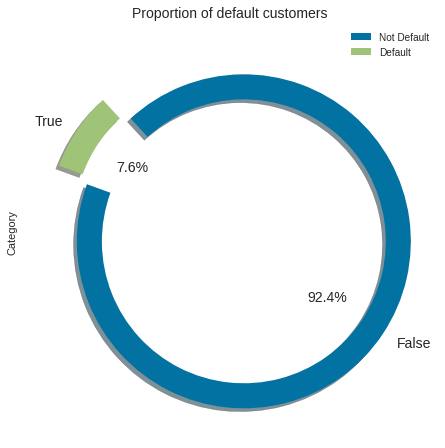

In [23]:
print('Customers who are not default:', data['is_default'].value_counts()[0])
print('Customers who are default:', data['is_default'].value_counts()[1])

space = np.ones(2)/10
data['is_default'].value_counts().plot(kind = 'pie', explode = space, fontsize = 14, autopct = '%3.1f%%', wedgeprops = dict(width=0.15), 
                                       shadow = True, startangle = 160, figsize = [13.66, 7.68], legend = True)
plt.legend(['Not Default', 'Default'])
plt.ylabel('Category')
plt.title('Proportion of default customers', size = 14)
plt.show()

**Observation:**

- It comes out that only **7.6% of customers** who took the loan have been identified defaulted out of 887377 customers.

**<h4>Question 2:** What is the **rate of loan default** with respect to **final_date?</h4>**

In [24]:
year_frame = pd.DataFrame(data.groupby(by = ['date_final', 'is_default']).size(), columns = ['Count'])
year_frame.transpose()

date_final 2007-02-11       2008-01-10       2008-01-11       2008-02-10  \
is_default      False True       False True       False True       False   
Count               1     1          8     3         12    19          3   

date_final       2008-02-11       2008-03-10       2008-04-10        \
is_default True       False True       False True       False True    
Count          5          8    23          7    11         16     7   

date_final 2008-05-10       2008-06-10       2008-07-10       2008-08-10  \
is_default      False True       False True       False True       False   
Count              15    15          8    12         18    19         14   

date_final       2008-09-10       2008-10-01       2009-01-10        \
is_default True       False True       False True       False True    
Count         17         18    22         23    32         17    23   

date_final 2009-01-11       2009-02-10       2009-02-11       2009-03-10  \
is_default      False True       False True       False True       False   
Count              53    27         33    32         65    51         37   

date_final       2009-04-10       2009-05-10       2009-06-10        \
is_default True       False True       False True       False True    
Count         25         41    31         27    33         27    38   

date_final 2009-07-10       2009-08-10       2009-09-10       2009-10-01  \
is_default      False True       False True       False True       False   
Count              40    32         36    30         24    31         49   

date_final       2010-01-10       2010-01-11       2010-02-10        \
is_default True       False True       False True       False True    
Count         36         61    39        197    61        115    33   

date_final 2010-02-11       2010-03-10       2010-04-10       2010-05-10  \
is_default      False True       False True       False True       False   
Count             253    79        120    64         94    51        104   

date_final       2010-06-10       2010-07-10       2010-08-10        \
is_default True       False True       False True       False True    
Count         47        104    46        184    63        145    53   

date_final 2010-09-10       2010-10-01       2011-01-10       2011-01-11  \
is_default      False True       False True       False True       False   
Count             154    61        209    83        275    55        386   

date_final       2011-02-10       2011-02-11       2011-03-10        \
is_default True       False True       False True       False True    
Count        101        380    57        445   140        522    74   

date_final 2011-04-10       2011-05-10       2011-06-10       2011-07-10  \
is_default      False True       False True       False True       False   
Count             434    85        353    95        349    91        345   

date_final       2011-08-10       2011-09-10       2011-10-01        \
is_default True       False True       False True       False True    
Count        109        359   120        366   125        345   137   

date_final 2012-01-10       2012-01-11       2012-02-10       2012-02-11  \
is_default      False True       False True       False True       False   
Count             442   133        901   297        640   163        904   

date_final       2012-03-10       2012-04-10       2012-05-10        \
is_default True       False True       False True       False True    
Count        294        796   155        710   150        712   166   

date_final 2012-06-10       2012-07-10       2012-08-10       2012-09-10  \
is_default      False True       False True       False True       False   
Count             651   210        731   231        886   248        866   

date_final       2012-10-01       2013-01-10       2013-01-11        \
is_default True       False True       False True       False True    
Count        259        936   332       1139   340       2023   639   

date_final 20

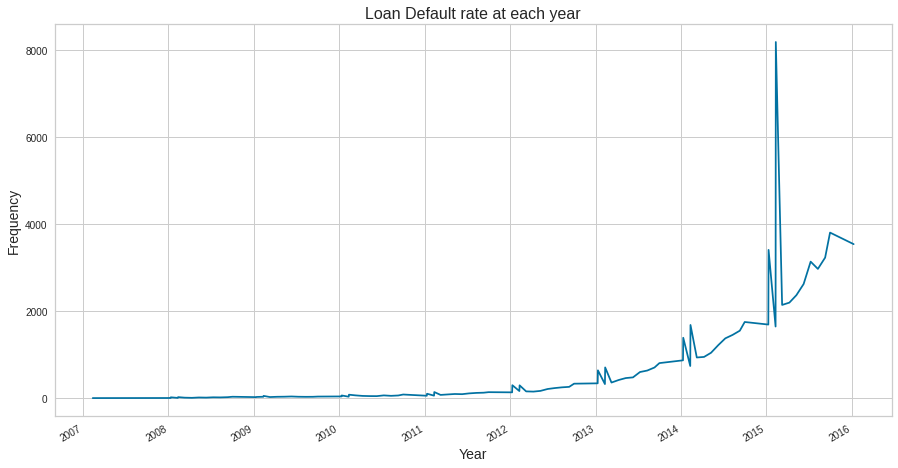

In [25]:
figure = plt.figure(figsize = [15, 8])

data[data['is_default'] == 1]['date_final'].value_counts().plot(kind = 'line')

plt.xlabel('Year', size = 14)
plt.ylabel('Frequency', size = 14)
plt.title('Loan Default rate at each year', size = 16)
plt.show()

**Observation:**

- We can see that default rate **around 2015-02 year was more steep than any other year.**

**<h4>Question 3**: What is the **frequency** of **ownership** with respect to the being **default** of loan?</h4>

In [26]:
own_type_frame = pd.DataFrame(data.groupby(by = ['own_type', 'is_default']).size(), columns = ['Count'])
own_type_frame.transpose()

own_type     ANY MORTGAGE         NONE       OTHER          OWN          RENT  \
is_default False    False  True  False True  False True   False True    False   
Count          3   413856  29699    42     8   144    38  81177  6293  324726   

own_type           
is_default  True   
Count       31391

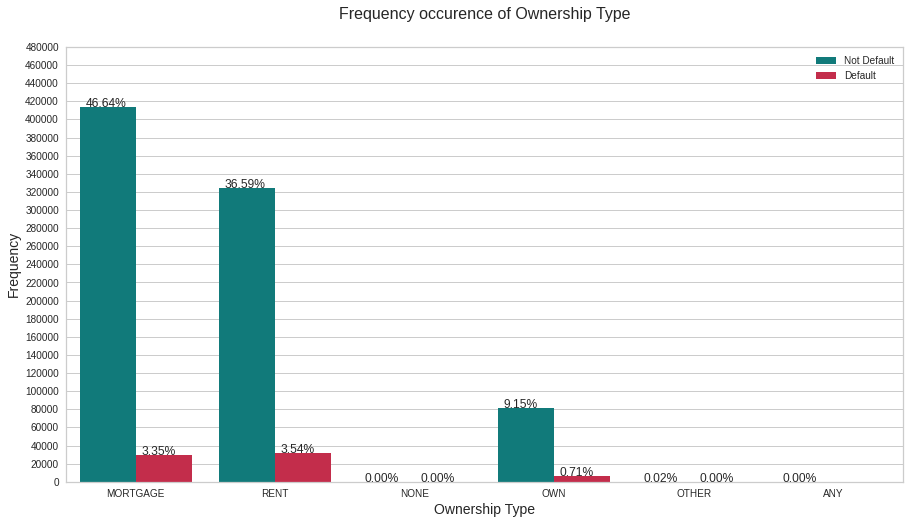

In [27]:
figure = plt.figure(figsize = [15, 8])

ax = sns.countplot(x = 'own_type',  data = data, hue = 'is_default', palette = ['darkcyan', 'crimson'])

total = data.shape[0]
for p in ax.patches:
  percentage = '{:.2f}%'.format(100*p.get_height()/total)
  x = p.get_x() + p.get_width() / 10
  y = p.get_y() + p.get_height() + 2
  ax.annotate(percentage, (x, y))

plt.yticks(range(0, 500000, 20000))
plt.xlabel('Ownership Type', size = 14)
plt.ylabel('Frequency', size = 14)
plt.legend(labels = ['Not Default', 'Default'], loc = 'upper right')
plt.title('Frequency occurence of Ownership Type', y=1.05, size = 16)
plt.show()

**Observation:**

- From the above analysis we can see that there are **very few or no data points** that are on **default** for **NONE**, **OTHER**, **ANY**. We could drop these points and visualize our results again.
- **Customers being default are only present for MORTGAGE, RENT and OWN type of Ownership**.

In [28]:
print('Before Filtering Shape:', data.shape)
data = data[(data['own_type'] == 'MORTGAGE') | (data['own_type'] == 'RENT') | (data['own_type'] == 'OWN')]
print('After Filtering Shape:', data.shape)

Before Filtering Shape: (887377, 22)
After Filtering Shape: (887142, 22)


**<h4>Question 4:** What is the **frequency** & **proportion** of **ownership** **type** that has been **acquired** with **respect to the loan**?</h4>

MORTGAGE    443555
RENT        356117
OWN          87470
Name: own_type, dtype: int64


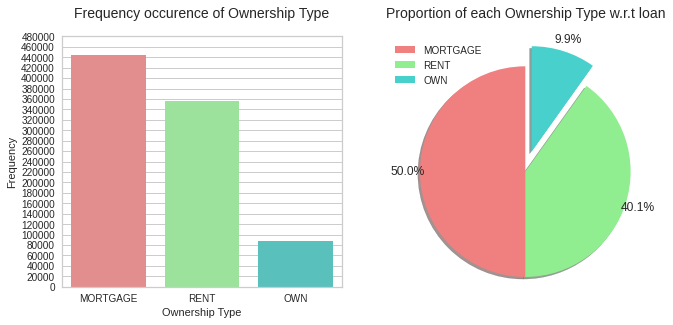

In [29]:
print(data['own_type'].value_counts())

# Bar Plot
colors_list = ['lightcoral', 'lightgreen', 'mediumturquoise']
figure = plt.figure(figsize = [15, 8])
plt.subplot(1, 2, 1)
sns.barplot(data['own_type'].value_counts().index, data['own_type'].value_counts(), palette  = colors_list)
plt.yticks(range(0, 500000, 20000))
plt.xlabel('Ownership Type')
plt.ylabel('Frequency')
plt.title('Frequency occurence of Ownership Type', y=1.05, size = 14)

explode_list = [0, 0 , 0.2]

plt.subplot(1, 2, 2)
# Pie Plot
data['own_type'].value_counts().plot(kind = 'pie', figsize = [10, 5], autopct = '%1.1f%%', startangle = 90, 
                                     shadow = True, labels = None, pctdistance = 1.12, colors = colors_list, 
                                     explode = explode_list)
plt.title('Proportion of each Ownership Type w.r.t loan', y = 1.05, size = 14)
plt.ylabel('')
plt.axis('equal')
plt.legend(labels = data['own_type'].value_counts().index, loc = 'upper left', frameon = False)
plt.tight_layout(pad=2.0)
plt.show()

**Observation:**

- From above we can see that **50% of customers have ownership under MORTGAGE type**.

**<h4>Question 5:** What is the **frequency** distribution of **loan defaulter across each state**?</h4>

In [30]:
year_frame = pd.DataFrame(data.groupby(by = ['state', 'is_default']).size(), columns = ['Count'])
year_frame.transpose()

state      Andhra Pradesh       Arunachal Pradesh        Assam        Bihar  \
is_default          False True              False True   False True   False   
Count               29214  2464             29312  2381  29291  2488  29203   

state            Chhattisgarh          Goa       Gujarat       Haryana        \
is_default True         False True   False True    False True    False True    
Count       2364        29736  2468  29314  2465   29169  2357   29515  2474   

state      Himachal Pradesh       Jharkhand       Karnataka       Kerala  \
is_default            False True      False True      False True   False   
Count                 29263  2460     29174  2370     29265  2344  29260   

state            Madhya Pradesh       Maharashtra       Manipur        \
is_default True           False True        False True    False True    
Count       2416          29312  2435       29373  2351   29196  2400   

state      Meghalaya       Mizoram       Nagaland       Odisha       Punjab  \
is_default     False True    False True     False True   False True   False   
Count          28895  2380   29088  2439    29296  2399  29095  2486  29469   

state            Rajasthan       Sikkim       Tamil Nadu       Telangana  \
is_default True      False True   False True       False True      False   
Count       2376     29210  2453  29680  2444      29121  2391     29122   

state            Tripura       Uttar Pradesh       Uttarakhand        \
is_default True    False True          False True        False True    
Count       2451   29322  2337         29370  2370       29249  2278   

state      West Bengal        
is_default       False True   
Count            29245  2342

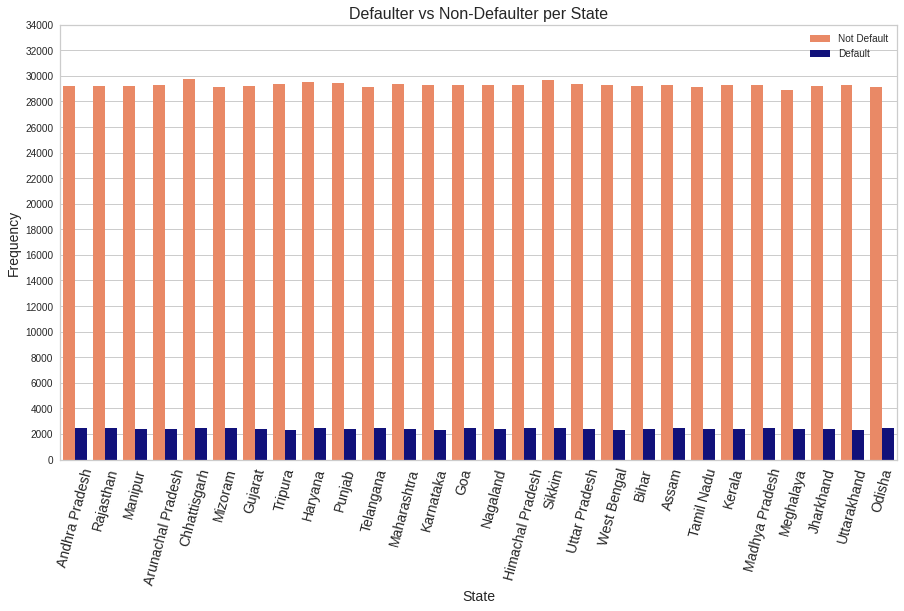

In [31]:
figure = plt.figure(figsize = [15, 8])

sns.countplot(x = 'state',  data = data, hue = 'is_default', palette = ['coral', 'darkblue'])

plt.yticks(range(0, 35000, 2000))
plt.xlabel('State', size = 14)
plt.xticks(rotation = 75, size = 14)
plt.ylabel('Frequency', size = 14)
plt.legend(labels = ['Not Default', 'Default'], loc = 'upper right')
plt.title('Defaulter vs Non-Defaulter per State', y = 1, size = 16)
plt.show()

**Observation:**

- From the above visualization, we found that **each state has almost equally default rate frequency distribution (~2500/state)**.

**<h4>Question 6:** What is the **distribution** of **loan default with respect to the loan duration**?</h4>

In [32]:
loan_duration_frame = pd.DataFrame(data.groupby(by = ['loan_duration', 'is_default']).size(), columns = ['Count'])
loan_duration_frame.transpose()

loan_duration  36 months         60 months       
is_default         False  True       False  True 
Count             578014  42889     241745  24494

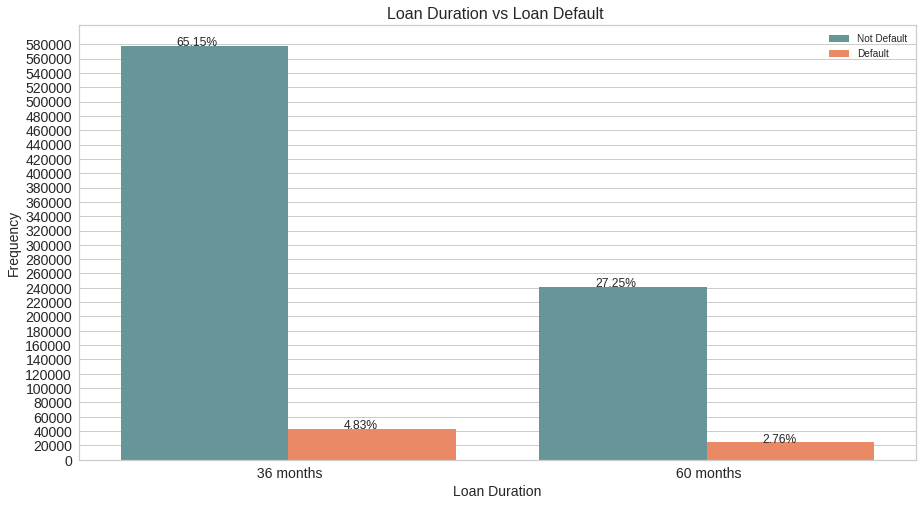

In [33]:
figure = plt.figure(figsize = [15, 8])

ax = sns.countplot(x = 'loan_duration',  data = data, hue = 'is_default', palette = ['cadetblue', 'coral'])

total = data.shape[0]
for p in ax.patches:
  percentage = '{:.2f}%'.format(100*p.get_height()/total)
  x = p.get_x() + p.get_width() / 3
  y = p.get_y() + p.get_height()
  ax.annotate(percentage, (x, y))

plt.xlabel('Loan Duration', size = 14)
plt.ylabel('Frequency', size = 14)
plt.xticks(size = 14)
plt.yticks(range(0, 600000, 20000), size = 14)
plt.legend(labels = ['Not Default', 'Default'], loc = 'upper right')
plt.title('Loan Duration vs Loan Default ', y = 1, size = 16)
plt.show()

**Observation:**

- Customers with **36 months loan duration** are found to be **more defaulter** **than** the customers with 60 months of loan duration.

**<h4>Question 7:** What is the **frequency** distribution of **loan purpose with respect to loan default**?</h4>

In [34]:
loan_duration_frame = pd.DataFrame(data.groupby(by = ['loan_purpose', 'is_default']).size(), columns = ['Count'])
loan_duration_frame.transpose()

loan_purpose   car       credit_card        debt_consolidation         \
is_default   False True        False  True               False  True    
Count         8265   595      194367  11743             482547  41589   

loan_purpose educational       home_improvement       house        \
is_default         False True             False True  False True    
Count                331    87            48263  3551  3288   416   

loan_purpose major_purchase       medical       moving        other        \
is_default            False True    False True   False True   False True    
Count                 15975  1294    7731   804   4805   606  38708  4158   

loan_purpose renewable_energy       small_business       vacation        \
is_default              False True           False True     False True    
Count                     502    72           8586  1777     4334   402   

loan_purpose wedding        
is_default     False True   
Count           2057   289

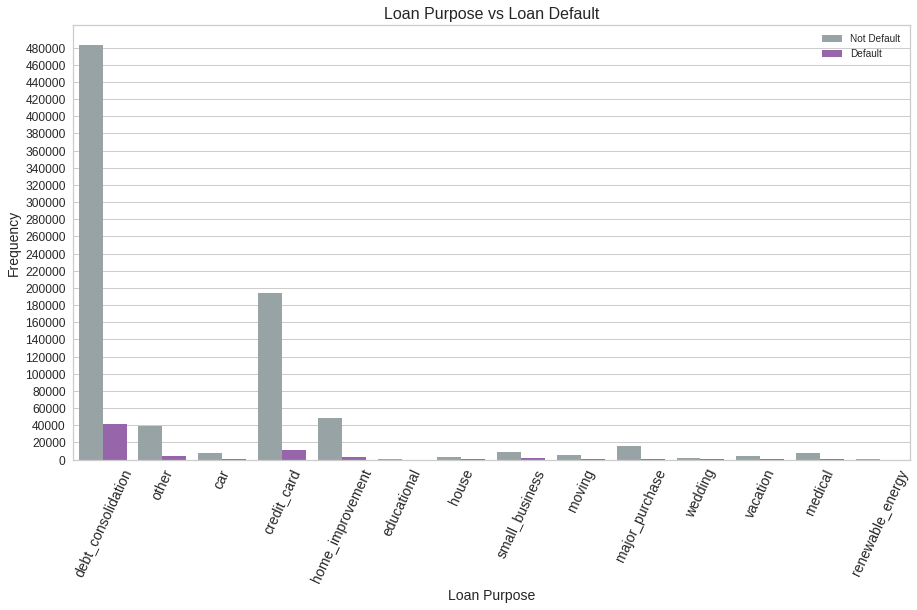

In [35]:
figure = plt.figure(figsize = [15, 8])
sns.countplot(x = 'loan_purpose',  data = data, hue = 'is_default', palette = ['#95a5a6', '#9b59b6'])
plt.xlabel('Loan Purpose', size = 14)
plt.ylabel('Frequency', size = 14)
plt.xticks(rotation = 65, size = 14)
plt.yticks(ticks = range(0, 500000, 20000), size = 12)
plt.legend(labels = ['Not Default', 'Default'], loc = 'upper right')
plt.title('Loan Purpose vs Loan Default', y = 1, size = 16)
plt.show()

**Observation:**

- Customers with **debt_consolidation** are found to be **more defaulter than any other reason** of loan purpose.

**<h4>Question 8:** Which **grade** is **mostly influenced by** the **is_default** feature?</h4>

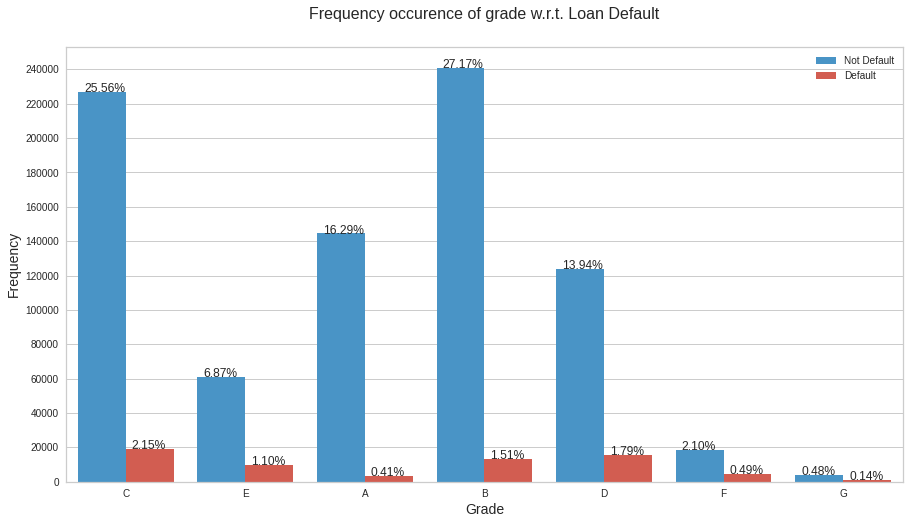

In [36]:
figure = plt.figure(figsize = [15, 8])

ax = sns.countplot(x = 'grade',  data = data, hue = 'is_default', palette = ['#3498db', '#e74c3c'])

total = data.shape[0]
for p in ax.patches:
  percentage = '{:.2f}%'.format(100*p.get_height()/total)
  x = p.get_x() + p.get_width() / 8
  y = p.get_y() + p.get_height()
  ax.annotate(percentage, (x, y))
  
plt.xlabel('Grade', size = 14)
plt.ylabel('Frequency', size = 14)
plt.yticks(ticks = range(0, 260000, 20000))
plt.legend(labels = ['Not Default', 'Default'], loc = 'upper right')
plt.title('Frequency occurence of grade w.r.t. Loan Default', y = 1.05, size = 16)
plt.show()

**Observation:**

- We can see that **C grade is highly influenced** followed by **D** then **B** and then all other in order.

Now **we will** make a function to **analyze the default rate with respect to some numerical features**. We will **analyze the outliers and perform capping** over these outliers.

In [39]:
def QuantileDistPlot(x, y, sup_title):
  '''
  A function to plot distribution of quantiles of features
  x: categorical feature
  y: Numerical feature
  sup_title: sup_title
  '''
  figure = plt.figure(figsize = [15, 7])
  plt.subplot(1, 2, 1)
  sns.boxplot(y = data[x])
  plt.xlabel('Overall', size = 14)
  plt.ylabel('Interest Rate', size = 14)
  plt.title('Aggregate View', size = 16)
  plt.suptitle(t = "Quantile Distribution of " + sup_title + " feature", y = 1.03, size = 18)

  plt.subplot(1, 2, 2)
  ax = sns.boxplot(x = data[y], y = data[x])
  ax.set_xticklabels(labels = ['No', 'Yes'])
  plt.xlabel('Default', size = 14)
  plt.ylabel('Interest Rate', size = 14)
  plt.title('Segregate View', size = 16)
  plt.tight_layout(pad = 2.0)
  plt.show()

**<h4>Question 9:** What is the **distribution of annual income with being default or not**?</h4>

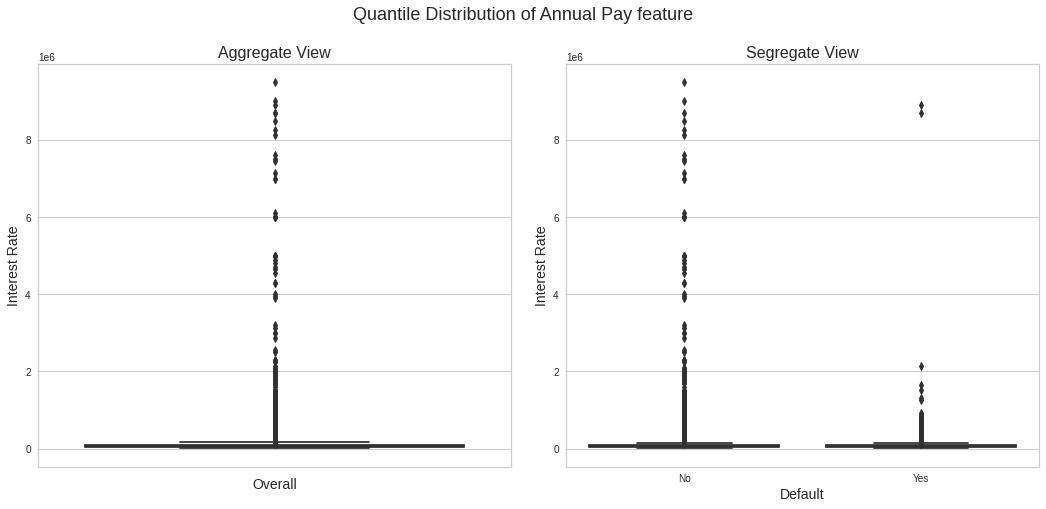

In [40]:
QuantileDistPlot(x = 'annual_pay', y = 'is_default', sup_title = 'Annual Pay')

**Observation:**

- As a result we saw **so many** values which are **outliers**.
- We **will estimate the 99th percentile value** and **perform the capping over these outliers**.

Before making changes we should **analyze the amount** that is **present at 99th percentile**.

In [41]:
print('Amount [at 99 percentile]:', data['annual_pay'].quantile(0.99))

Amount [at 99 percentile]: 250000.0


Next we need to **identify** that part of the **data**, that contains defaulter as well as non-defaulter **greater than 99th percentile**.

In [42]:
annual_pay_default = data[(data['is_default'] == 1) & (data['annual_pay'] > data['annual_pay'].quantile(0.99))]['annual_pay']
annual_pay_notdefault = data[(data['is_default'] == 0) & (data['annual_pay'] > data['annual_pay'].quantile(0.99))]['annual_pay']

print('Customers Frequency [default]:', len(annual_pay_default))
print('Customers Frequency [not default]:', len(annual_pay_notdefault))

Customers Frequency [default]: 362
Customers Frequency [not default]: 7604


We can also look at the **average amount for the defaulter as well as non-defaulter**.

In [44]:
print('The average annual income of customers [default]:', np.round(annual_pay_default.mean(), decimals = 2))
print('The average annual income of customers [not default]:', np.round(annual_pay_notdefault.mean(), decimals = 2))

The average annual income of customers [default]: 428784.56
The average annual income of customers [not default]: 409951.45


**Performing capping over outliers**

- From the above analysis we can saw that **annual_pay** feature contains **outliers**. 
- We can **apply capping here at 99th percentile** and visualize again.

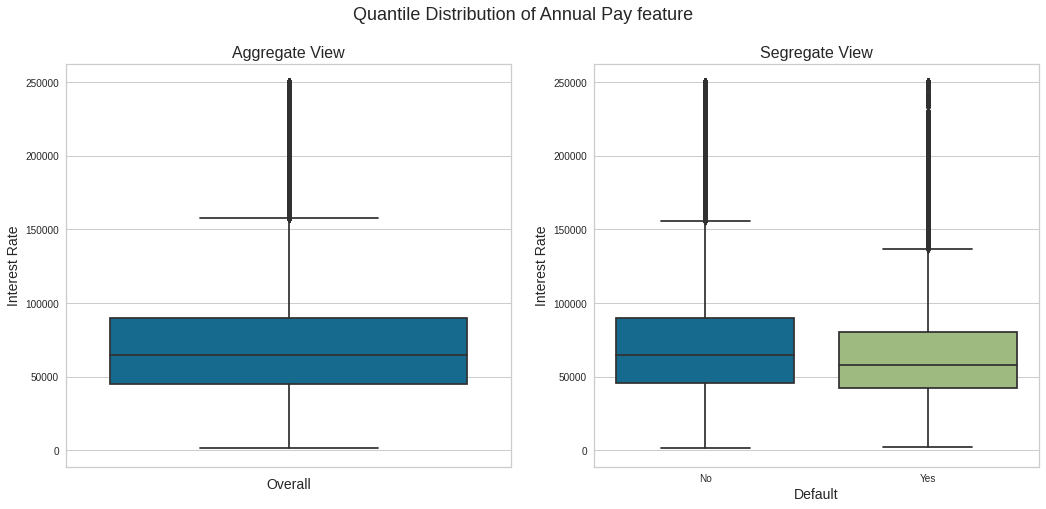

In [45]:
outlier_index = data[data['annual_pay'] > data['annual_pay'].quantile(0.99)].index
data.loc[outlier_index, 'annual_pay'] = data['annual_pay'].quantile(0.99)
QuantileDistPlot(x = 'annual_pay', y = 'is_default', sup_title = 'Annual Pay')

**Observation:**

- From above we can see that the **values are distributed outside the extremes**. 
- **We will handle this** spread by **applying standardization** on data when we will prepare data **before feeding to the model**.

**<h4>Question 10:** What is the **distribution of interest rate with being default or not**?</h4>

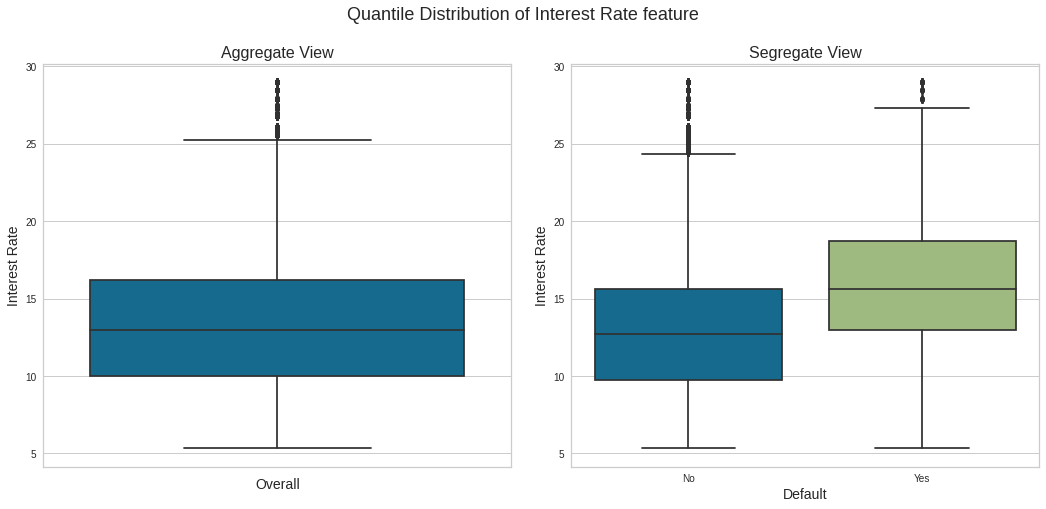

In [46]:
QuantileDistPlot(x = 'interest_rate', y = 'is_default', sup_title = 'Interest Rate')

**Observation:**

- We can see some **outlier**. We can perform **capping** here. 
- We shall see the values greater than 99th precentile.
- Lets' get the value of interest rate at **99th percentile** and replace the outlied values with 99th percentile value.


Before making changes we should **analyze the interest rate** that is **present at 99th percentile**.

In [47]:
print('Interest Rate [at 99 percentile]:', data['interest_rate'].quantile(0.99))

Interest Rate [at 99 percentile]: 24.99


Next we need to **identify** that part of the **data**, that contains defaulter as well as non-defaulter **greater than 99th percentile**.

In [48]:
interest_rate_default = data[(data['is_default'] == 1) & (data['interest_rate'] > data['interest_rate'].quantile(0.99))]['interest_rate']
interest_rate_notdefault = data[(data['is_default'] == 0) & (data['interest_rate'] > data['interest_rate'].quantile(0.99))]['interest_rate']

print('Customers Frequency [default]:', len(interest_rate_default))
print('Customers Frequency [not default]:', len(interest_rate_notdefault))

Customers Frequency [default]: 1303
Customers Frequency [not default]: 5190


We can also look at the **average interest rate for the defaulter as well as non-defaulter**.

In [49]:
print('The average interest rate [default]:', np.round(interest_rate_default.mean(), decimals = 2))
print('The average interest rate [not default]:', np.round(interest_rate_notdefault.mean(), decimals = 2))

The average interest rate [default]: 25.93
The average interest rate [not default]: 26.17


**Performing capping over outliers**

- From the above analysis we can saw that **interest_rate** feature contains **outliers**. 
- We can **apply capping here at 99th percentile** and visualize again.

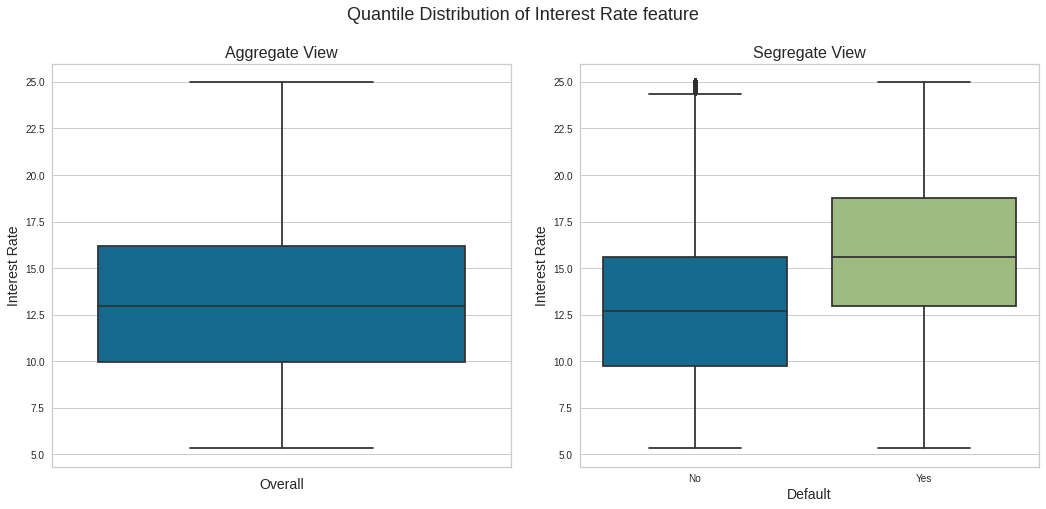

In [50]:
# Performing capping and analyzing again
outlier_index = data[data['interest_rate'] > data['interest_rate'].quantile(0.99)].index
data.loc[outlier_index, 'interest_rate'] = data['interest_rate'].quantile(0.99)
QuantileDistPlot(x = 'interest_rate', y = 'is_default', sup_title = 'Interest Rate')

**Observation:**

- We can see that there are **still some values that lies at extreme** for non-defaulter. 
- We **will handle this** by **applying standardization while preparing data** **for our model**.

**<h4>Question 11:** What is the **distribution of Dept to Income Ratio (dti) with being default or not**?</h4>

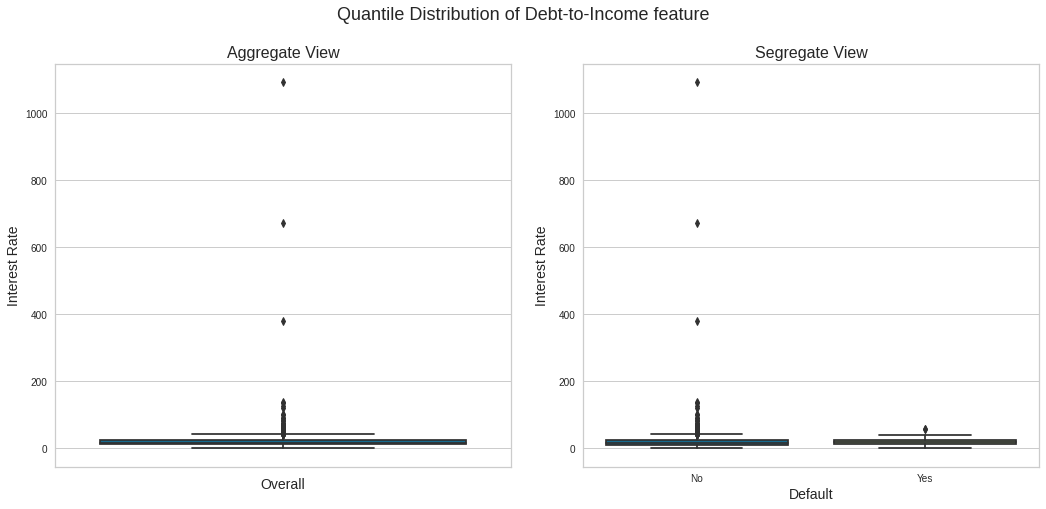

In [51]:
QuantileDistPlot(x = 'dti', y = 'is_default', sup_title = 'Debt-to-Income')

**Observation:**

- Again we can see some **outliers in the dti feature.** 
- **We will do the same thing, replacing outliers with 99th percentile.**

Before making changes we should **analyze the dti** that is **present at 99th percentile**.

In [52]:
print('Debt to Income Ratio (dti) [at 99 percentile]:', data['dti'].quantile(0.99))

Debt to Income Ratio (dti) [at 99 percentile]: 37.48


Next we need to **identify** that part of the **data**, that contains defaulter as well as non-defaulter **greater than 99th percentile**.

In [53]:
dti_default = data[(data['is_default'] == 1) & (data['dti'] > data['dti'].quantile(0.99))]['dti']
dti_notdefault = data[(data['is_default'] == 0) & (data['dti'] > data['dti'].quantile(0.99))]['dti']

print('Customers Frequency [default]:', len(dti_default))
print('Customers Frequency [not default]:', len(dti_notdefault))

Customers Frequency [default]: 536
Customers Frequency [not default]: 8324


We can also look at the **average dti for the defaulter as well as non-defaulter**.

In [54]:
print('The average dti value of issued loan [default]', np.round(dti_default.mean(), decimals = 2))
print('The average dti value of issued loan [not default]', np.round(dti_notdefault.mean(), decimals = 2))

The average dti value of issued loan [default] 38.73
The average dti value of issued loan [not default] 39.08


**Performing capping over outliers**

- From the above analysis we can saw that **dti** feature contains **outliers**. 
- We can **apply capping here at 99th percentile** and visualize again.

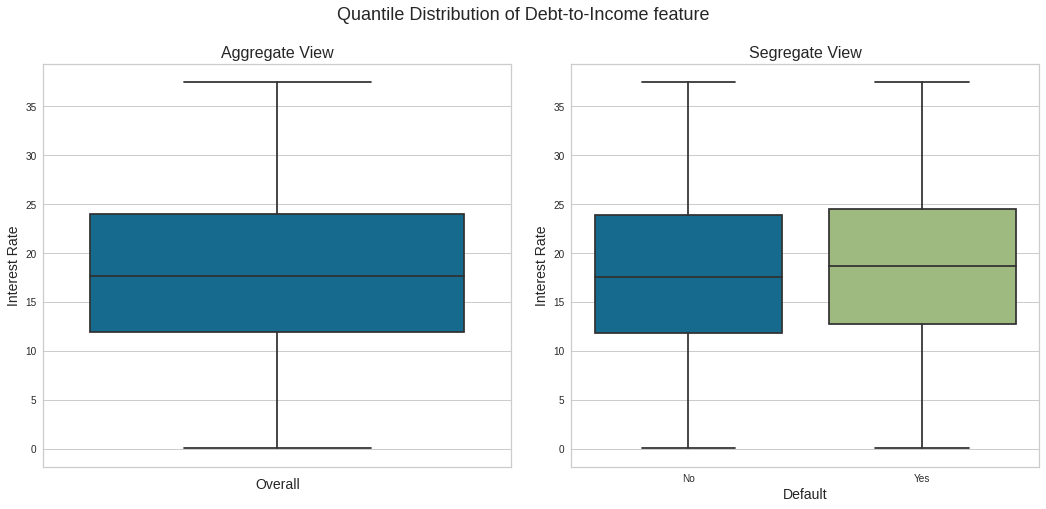

In [55]:
# Performing capping and analyzing again
outlier_index = data[data['dti'] > data['dti'].quantile(0.99)].index
data.loc[outlier_index, 'dti'] = data['dti'].quantile(0.99)
QuantileDistPlot(x = 'dti', y = 'is_default', sup_title = 'Debt-to-Income')

**Observation:**

- It turns out that **we get rid of all the outliers present for dti feature**.

<a id = Section7></a>
# **7. Post Data Processing & Feature Selection**

In [56]:
print('Data Shape:', data.shape)
data.head()

Data Shape: (887142, 22)


,cust_id,year,state,date_issued,date_final,emp_duration,own_type,income_type,app_type,loan_purpose,interest_payments,grade,annual_pay,loan_amount,interest_rate,loan_duration,dti,total_pymnt,total_rec_prncp,recoveries,installment,is_default
0,180675,2007,Andhra Pradesh,2007-01-12,2009-03-10,10.0,MORTGAGE,Low,INDIVIDUAL,debt_consolidation,Low,C,73000.0,25000,10.91,36 months,22.13,13650.38,8767.32,2207.65,817.41,True
1,85781,2007,Rajasthan,2007-01-06,2010-07-10,0.5,RENT,Low,INDIVIDUAL,other,Low,C,40000.0,1400,10.91,36 months,8.61,1663.04,1400.00,0.00,45.78,False
2,85675,2007,Manipur,2007-01-06,2010-06-10,10.0,RENT,Low,INDIVIDUAL,other,High,E,25000.0,1000,14.07,36 months,16.27,1231.38,1000.00,0.00,34.21,False
3,84918,2007,Andhra Pradesh,2007-01-09,2008-04-10,10.0,MORTGAGE,Low,INDIVIDUAL,other,Low,A,65000.0,5000,7.43,36 months,0.28,5200.44,5000.00,0.00,155.38,False
4,84670,2007,Arunachal Pradesh,2007-01-06,2009-08-10,10.0,MORTGAGE,High,INDIVIDUAL,other,Low,A,250000.0,5000,7.75,36 months,5.38,5565.65,5000.00,0.00,156.11,False


### **Dropping Unncessary Features:**
We can **drop cust_id, date_issued and date_final** as they are not useful for prediction purpose.

In [57]:
data.drop(labels = ['cust_id', 'date_issued', 'date_final'], axis = 1, inplace = True)
print(data.shape)
data.head()

(887142, 19)


,year,state,emp_duration,own_type,income_type,app_type,loan_purpose,interest_payments,grade,annual_pay,loan_amount,interest_rate,loan_duration,dti,total_pymnt,total_rec_prncp,recoveries,installment,is_default
0,2007,Andhra Pradesh,10.0,MORTGAGE,Low,INDIVIDUAL,debt_consolidation,Low,C,73000.0,25000,10.91,36 months,22.13,13650.38,8767.32,2207.65,817.41,True
1,2007,Rajasthan,0.5,RENT,Low,INDIVIDUAL,other,Low,C,40000.0,1400,10.91,36 months,8.61,1663.04,1400.00,0.00,45.78,False
2,2007,Manipur,10.0,RENT,Low,INDIVIDUAL,other,High,E,25000.0,1000,14.07,36 months,16.27,1231.38,1000.00,0.00,34.21,False
3,2007,Andhra Pradesh,10.0,MORTGAGE,Low,INDIVIDUAL,other,Low,A,65000.0,5000,7.43,36 months,0.28,5200.44,5000.00,0.00,155.38,False
4,2007,Arunachal Pradesh,10.0,MORTGAGE,High,INDIVIDUAL,other,Low,A,250000.0,5000,7.75,36 months,5.38,5565.65,5000.00,0.00,156.11,False


### **Handling Categorical Features:**

We can perform **label encoding on year, income_type, app_type, interest_payments, grade, loan_duration** as they are ordered features & **one hot encoding on own_type, loan_purpose** as they are unordered in nature. But state is unordered, if performed label encoding, machine will make a difference and if we performed dummification, there will be too many features. Instead we can drop it.

In [58]:
data.drop(labels = ['state'], axis = 1, inplace = True)
print(data.shape)
print('Drop Success!')

(887142, 18)
Drop Success!


#### **Performing Label Encoding**

In [59]:
ordered_labels = ['year', 'income_type', 'app_type', 'interest_payments', 'grade', 'loan_duration']
encode = LabelEncoder()

for i in ordered_labels:
  if isinstance(data[i].dtype, object):
    data[i] = encode.fit_transform(data[i])
print('Label Encoding Success!')
print('Data Shape:', data.shape)
data.head()

Label Encoding Success!
Data Shape: (887142, 18)


,year,emp_duration,own_type,income_type,app_type,loan_purpose,interest_payments,grade,annual_pay,loan_amount,interest_rate,loan_duration,dti,total_pymnt,total_rec_prncp,recoveries,installment,is_default
0,0,10.0,MORTGAGE,1,0,debt_consolidation,1,2,73000.0,25000,10.91,0,22.13,13650.38,8767.32,2207.65,817.41,True
1,0,0.5,RENT,1,0,other,1,2,40000.0,1400,10.91,0,8.61,1663.04,1400.00,0.00,45.78,False
2,0,10.0,RENT,1,0,other,0,4,25000.0,1000,14.07,0,16.27,1231.38,1000.00,0.00,34.21,False
3,0,10.0,MORTGAGE,1,0,other,1,0,65000.0,5000,7.43,0,0.28,5200.44,5000.00,0.00,155.38,False
4,0,10.0,MORTGAGE,0,0,other,1,0,250000.0,5000,7.75,0,5.38,5565.65,5000.00,0.00,156.11,False


#### **Performing Dummification**

In [60]:
data = pd.get_dummies(data = data, columns = ['own_type', 'loan_purpose'])
print('Data Shape:', data.shape)
data.head()

Data Shape: (887142, 33)


,year,emp_duration,income_type,app_type,interest_payments,grade,annual_pay,loan_amount,interest_rate,loan_duration,dti,total_pymnt,total_rec_prncp,recoveries,installment,is_default,own_type_MORTGAGE,own_type_OWN,own_type_RENT,loan_purpose_car,loan_purpose_credit_card,loan_purpose_debt_consolidation,loan_purpose_educational,loan_purpose_home_improvement,loan_purpose_house,loan_purpose_major_purchase,loan_purpose_medical,loan_purpose_moving,loan_purpose_other,loan_purpose_renewable_energy,loan_purpose_small_business,loan_purpose_vacation,loan_purpose_wedding
0,0,10.0,1,0,1,2,73000.0,25000,10.91,0,22.13,13650.38,8767.32,2207.65,817.41,True,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0.5,1,0,1,2,40000.0,1400,10.91,0,8.61,1663.04,1400.00,0.00,45.78,False,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,10.0,1,0,0,4,25000.0,1000,14.07,0,16.27,1231.38,1000.00,0.00,34.21,False,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,10.0,1,0,1,0,65000.0,5000,7.43,0,0.28,5200.44,5000.00,0.00,155.38,False,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,10.0,0,0,1,0,250000.0,5000,7.75,0,5.38,5565.65,5000.00,0.00,156.11,False,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [61]:
X, y = data.drop('is_default', axis = 1), data['is_default']
print('X Shape:', X.shape)
print('y Shape:', y.shape)

X Shape: (887142, 32)
y Shape: (887142,)


#### **Performing Standardization**

In [62]:
std_scale = StandardScaler()
scale_fit = std_scale.fit_transform(X)

X_data = pd.DataFrame(scale_fit, columns = X.columns)
print('Data Shape:', X_data.shape)
X_data.head()

Data Shape: (887142, 32)


,year,emp_duration,income_type,app_type,interest_payments,grade,annual_pay,loan_amount,interest_rate,loan_duration,dti,total_pymnt,total_rec_prncp,recoveries,installment,own_type_MORTGAGE,own_type_OWN,own_type_RENT,loan_purpose_car,loan_purpose_credit_card,loan_purpose_debt_consolidation,loan_purpose_educational,loan_purpose_home_improvement,loan_purpose_house,loan_purpose_major_purchase,loan_purpose_medical,loan_purpose_moving,loan_purpose_other,loan_purpose_renewable_energy,loan_purpose_small_business,loan_purpose_vacation,loan_purpose_wedding
0,-5.574432,1.125972,-0.351903,-0.02396,0.952365,0.153641,-0.014241,1.214361,-0.534239,-0.654823,0.484277,0.774092,0.454409,5.277843,1.558951,1.000036,-0.33073,-0.818915,-0.100438,-0.550131,0.832214,-0.021712,-0.249055,-0.064751,-0.140898,-0.098561,-0.078338,-0.225328,-0.025445,-0.108717,-0.073261,-0.051492
1,-5.574432,-1.582662,-0.351903,-0.02396,0.952365,0.153641,-0.816022,-1.583304,-0.534239,-0.654823,-1.151969,-0.748932,-0.657606,-0.112030,-1.601041,-0.999964,-0.33073,1.221128,-0.100438,-0.550131,-1.201614,-0.021712,-0.249055,-0.064751,-0.140898,-0.098561,-0.078338,4.437984,-0.025445,-0.108717,-0.073261,-0.051492
2,-5.574432,1.125972,-0.351903,-0.02396,-1.050017,1.677418,-1.180468,-1.630722,0.190819,-0.654823,-0.224924,-0.803776,-0.717981,-0.112030,-1.648422,-0.999964,-0.33073,1.221128,-0.100438,-0.550131,-1.201614,-0.021712,-0.249055,-0.064751,-0.140898,-0.098561,-0.078338,4.437984,-0.025445,-0.108717,-0.073261,-0.051492
3,-5.574432,1.125972,-0.351903,-0.02396,0.952365,-1.370135,-0.208612,-1.156542,-1.332720,-0.654823,-2.160099,-0.299496,-0.114226,-0.112030,-1.152205,1.000036,-0.33073,-0.818915,-0.100438,-0.550131,-1.201614,-0.021712,-0.249055,-0.064751,-0.140898,-0.098561,-0.078338,4.437984,-0.025445,-0.108717,-0.073261,-0.051492
4,-5.574432,1.125972,-2.865940,-0.02396,0.952365,-1.370135,4.286219,-1.156542,-1.259296,-0.654823,-1.542876,-0.253095,-0.114226,-0.112030,-1.149215,1.000036,-0.33073,-0.818915,-0.100438,-0.550131,-1.201614,-0.021712,-0.249055,-0.064751,-0.140898,-0.098561,-0.078338,4.437984,-0.025445,-0.108717,-0.073261,-0.051492


In [63]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y, test_size = 0.2, random_state = 42, stratify = y)
print('Train Shape:', X_train.shape, y_train.shape)
print('Test Shape:', X_test.shape, y_test.shape)

Train Shape: (709713, 32) (709713,)
Test Shape: (177429, 32) (177429,)


### **Feature Selection using Random Forest**

- **Random forests** are one the most **popular machine learning algorithms** because they **provide**:
 - **a good predictive performance**,
 - **low overfitting and**
 - **easy interpretability.** 
- This interpretability **derives** the **importance of each feature** on the tree decision. 
- In other words, it is **easy to compute** how much **each feature is contributing** to the **decision**.

In [64]:
# Have some patience, may take some time :)
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100, random_state = 42, class_weight = 'balanced'))
sel.fit(X_train, y_train)
selected_feat= X_train.columns[(sel.get_support())].tolist()

print('Total Features Selected are', len(selected_feat))
print('Features:', selected_feat)

Total Features Selected are 10
Features: ['year', 'emp_duration', 'annual_pay', 'loan_amount', 'interest_rate', 'dti', 'total_pymnt', 'total_rec_prncp', 'recoveries', 'installment']


**Observation:**

- **Important Features estimated by Random Forest:** 
 - year,
 - emp_duration
 - annual_pay, 
 - loan_amount, 
 - interest_rate, 
 - dti, 
 - total_pymnt, 
 - total_rec_prncp, 
 - recoveries, 
 - installment.

<a id = Section8></a>
# **8. Model Development & Evaluation**

- In this section we'll **build model using** only **important features** that **impact** highly on our **target** feature i.e. **is_default**.
- In the following part we **made** a **function** to **measure** the **performance** of the **model**.

In [66]:
def PRCurve(model):
  '''
  A function to visualize Precision Recall Curve.
  Returns average precision score of the model.
  Data to fit must be training i.e. X_train, y_train.
  Data score will be estimated on X_test, y_test.
  '''
  viz = PrecisionRecallCurve(model)
  viz.fit(X_train, y_train)
  avg_prec = viz.score(X_test, y_test)
  plt.legend(labels = ['Binary PR Curve',"AP=%.3f"%avg_prec], loc = 'lower right', prop={'size': 14})
  plt.xlabel(xlabel = 'Recall', size = 14)
  plt.ylabel(ylabel = 'Precision', size = 14)
  plt.title(label = 'Precision Recall Curve', size = 16)

<a id = Section81></a>
## **8.1 Baseline Models**

In [67]:
imp_feature = X_data[selected_feat]

X_train, X_test, y_train, y_test = train_test_split(imp_feature, y, test_size = 0.2, random_state = 42, stratify = y)

print('Training Data Shape:', X_train.shape, y_train.shape)
print('Testing Data Shape:', X_test.shape, y_test.shape)

Training Data Shape: (709713, 10) (709713,)
Testing Data Shape: (177429, 10) (177429,)


<a id = Section811></a>
#### **8.1.1 Logisitic Regression**

Accuracy Score (Train Data): 0.951
Accuracy Score (Test Data): 0.951
              precision    recall  f1-score   support

       False       0.95      1.00      0.97    163952
        True       0.97      0.36      0.53     13477

    accuracy                           0.95    177429
   macro avg       0.96      0.68      0.75    177429
weighted avg       0.95      0.95      0.94    177429



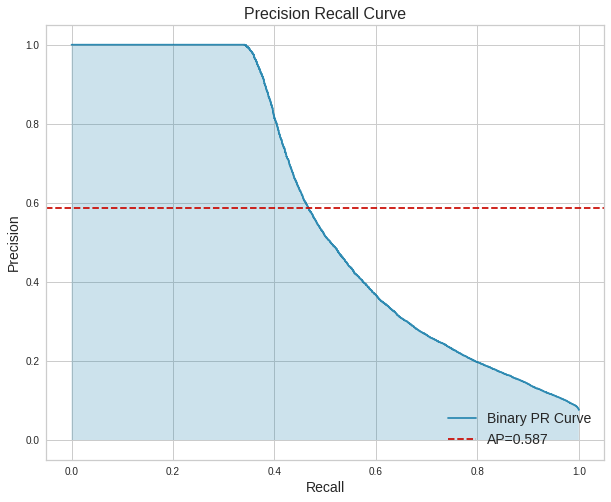

In [68]:
log  = LogisticRegression(random_state = 42)
log.fit(X_train, y_train)
y_pred = log.predict(X_test)

# Accuracy Estimation
print('Accuracy Score (Train Data):', np.round(log.score(X_train, y_train), decimals = 3))
print('Accuracy Score (Test Data):', np.round(log.score(X_test, y_test), decimals = 3))

# Classification Report
logistic_report = classification_report(y_test, y_pred)
print(logistic_report)

# Precision Recall Curve
figure = plt.figure(figsize = [10, 8])
PRCurve(model = log)
plt.show()

**Observation:**

- The **accuracy comes out to be 95%**, but we can analyze something strange here.
- **Recall of minority class is very less i.e 36% and f1 score comes out to be 53%**. 
- The **average precision** comes out to be **58.7%** only. 
- It can be seen that **model** is more **biased towards minority class**. 
- Let's **analyze** how **random forest** behaves on this imbalanced data.

<a id = Section812></a>
#### **8.1.2 Random Forest Classifier**

Accuracy Score (Train Data): 0.952
Accuracy Score (Test Data): 0.952
              precision    recall  f1-score   support

       False       0.95      1.00      0.97    163952
        True       1.00      0.37      0.54     13477

    accuracy                           0.95    177429
   macro avg       0.98      0.68      0.76    177429
weighted avg       0.95      0.95      0.94    177429



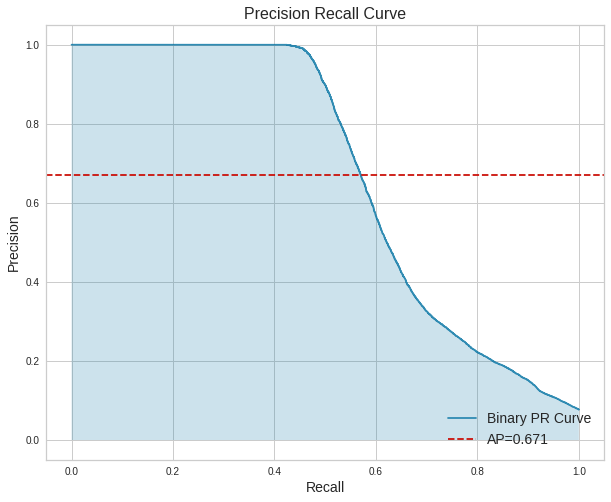

In [69]:
rfc = RandomForestClassifier(n_estimators = 100, max_depth = 5, random_state = 42, n_jobs = -1)
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

# Accuracy Estimation
print('Accuracy Score (Train Data):', np.round(rfc.score(X_train, y_train), decimals = 3))
print('Accuracy Score (Test Data):', np.round(rfc.score(X_test, y_test), decimals = 3))

# Classification Report
random_forest_report = classification_report(y_test, y_pred)
print(random_forest_report)

# Precision Recall Curve
figure = plt.figure(figsize = [10, 8])
PRCurve(model = rfc)
plt.show()

**Observation:**

- It seems there is **no change in accuracy but in recall of minority class i.e. 37% and f1 score of 54%**. 
- The **average precision score** has also **improved** and comes out to be **~67%**.
- **Random Forest failed to handle this undersampled data**. 
- **Let's try** it on **Extreme Gradient Boosting**.

<a id = Section813></a>
#### **8.1.3 Extreme Gradient Boosting Classifier**

Accuracy Score (Train Data): 0.966
Accuracy Score (Test Data): 0.966
              precision    recall  f1-score   support

       False       0.96      1.00      0.98    163952
        True       1.00      0.55      0.71     13477

    accuracy                           0.97    177429
   macro avg       0.98      0.78      0.85    177429
weighted avg       0.97      0.97      0.96    177429



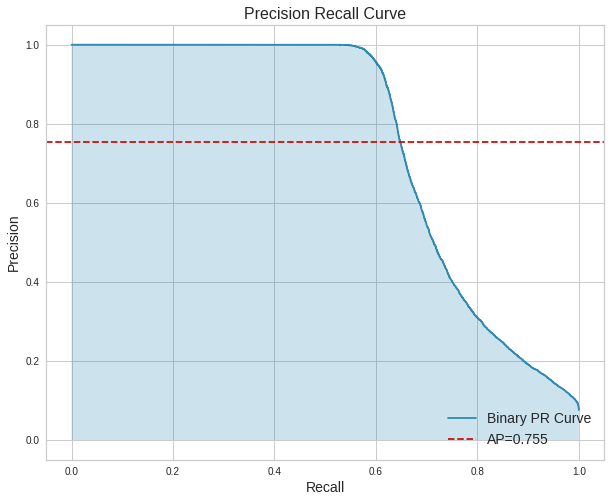

In [70]:
clf = XGBClassifier(max_depth = 5, n_jobs = -1, random_state = 42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# Accuracy Estimation
print('Accuracy Score (Train Data):', np.round(clf.score(X_train, y_train), decimals = 3))
print('Accuracy Score (Test Data):', np.round(clf.score(X_test, y_test), decimals = 3))

# Classification Report
XGB_report = classification_report(y_test, y_pred)
print(XGB_report)

# Precision Recall Curve
figure = plt.figure(figsize = [10, 8])
PRCurve(model = clf)
plt.show()

**Observation:**

- We can see that **average precision score** has improved to **75.5%** only.
- As our **Precision & Recall** values are **not good** because our **data** set is **highly imbalanced**. 
- We will opt **Synthetic Minority Oversampling Technique (SMOTE)** on **biased** **data** to solve the class imbalance problem.

<a id = Section82></a>
## **8.2 Oversampling Models**

#### **SMOTE Technique & its Implementation**

- SMOTE refers to **Synthetic Minority Oversampling Technique**.
- It **aims** to **balance class distribution** by **randomly** **increasing minority class** examples **by replicating** them. 
- It **synthesises** **new minority instances** **between** **existing** minority **instances**. 
- **It generates the virtual training records by linear interpolation for the minority class.** 
- These **synthetic training records are generated by randomly selecting** one or more of the k-nearest neighbors for each **example in the minority class**. 
- **After** the **oversampling process**, the **data is reconstructed** and several classification models can be applied for the processed data.

**Before Implimenting SMOTE**

In [71]:
print('Training Data Shape:', X_train.shape, y_train.shape)
print('Testing Data Shape:', X_test.shape, y_test.shape)

Training Data Shape: (709713, 10) (709713,)
Testing Data Shape: (177429, 10) (177429,)


**Performing SMOTE Operation**

In [72]:
# Have some patience, may take some time :)
sm = SMOTE(random_state = 42, ratio = 1)
X, y = sm.fit_sample(X_data, y)
X_new = pd.DataFrame(data = X, columns = X_data.columns)
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.2, random_state = 42, stratify = y)

**After Implimenting SMOTE**

In [73]:
print('Training Data Shape:', X_train.shape, y_train.shape)
print('Testing Data Shape:', X_test.shape, y_test.shape)

Training Data Shape: (1311614, 32) (1311614,)
Testing Data Shape: (327904, 32) (327904,)


<a id = Section821></a>
#### **8.2.1 Logistic Regression**

In [75]:
log  = LogisticRegression(random_state = 42)
log.fit(X_train, y_train)
y_pred = log.predict(X_test)

# Accuracy Estimation
print('Accuracy Score (Train Data):', np.round(log.score(X_train, y_train), decimals = 3))
print('Accuracy Score (Test Data):', np.round(log.score(X_test, y_test), decimals = 3))

# Classification Report
logistic_report = classification_report(y_test, y_pred)
print(logistic_report)

# Precision Recall Curve
figure = plt.figure(figsize = [10, 8])
PRCurve(model = log)
plt.show()

AttributeError: ignored

**Observation:**

- The result as comparsion to baseline is much better. 
- Even the accuracy has been **dropped to 78%** but still **our precision, recall & f1 score comes out to be much better**. 
- Our **average precision score** comes out to be **much better from before** as well i.e. **88%**.
- Let's see how random forest will be affected after balacing our minority class.

<a id = Section822></a>
#### **8.2.2 Random Forest Classifier**

Accuracy Score (Train Data): 0.794
Accuracy Score (Test Data): 0.794
              precision    recall  f1-score   support

       False       0.77      0.85      0.81    163952
        True       0.83      0.74      0.78    163952

    accuracy                           0.79    327904
   macro avg       0.80      0.79      0.79    327904
weighted avg       0.80      0.79      0.79    327904



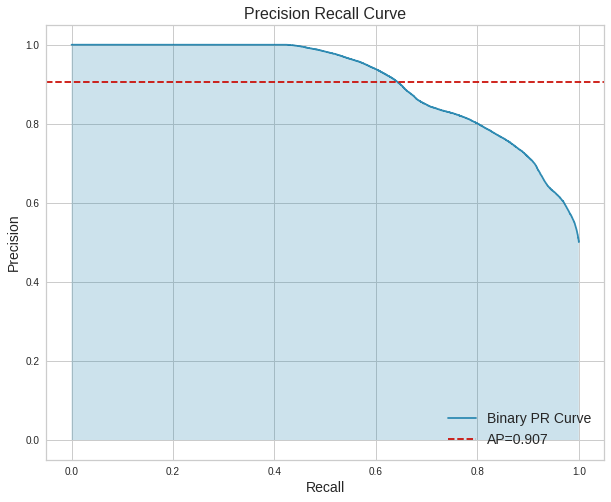

In [76]:
# Have some patience, may take some time :)
rfc = RandomForestClassifier(n_estimators = 100, max_depth = 5, random_state = 42, n_jobs = -1)
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

# Accuracy Estimation
print('Accuracy Score (Train Data):', np.round(rfc.score(X_train, y_train), decimals = 3))
print('Accuracy Score (Test Data):', np.round(rfc.score(X_test, y_test), decimals = 3))

# Classification Report
random_forest_report = classification_report(y_test, y_pred)
print(random_forest_report)

# Precision Recall Curve
figure = plt.figure(figsize = [10, 8])
PRCurve(model = rfc)
plt.show()

**Observation:**

- The **accuracy** has **improved only 1%** more **than Logistic Regression**.
- It can bee seen that **average precision score has improved to 90%**.  
- We will **analyze** how the **XGboosting algorithm** will behave.

<a id = Section823></a>
#### **8.2.3 Extreme Gradient Boosting Classifier**

Accuracy Score (Train Data): 0.916
Accuracy Score (Test Data): 0.915
              precision    recall  f1-score   support

       False       0.88      0.96      0.92    163952
        True       0.96      0.87      0.91    163952

    accuracy                           0.92    327904
   macro avg       0.92      0.92      0.92    327904
weighted avg       0.92      0.92      0.92    327904



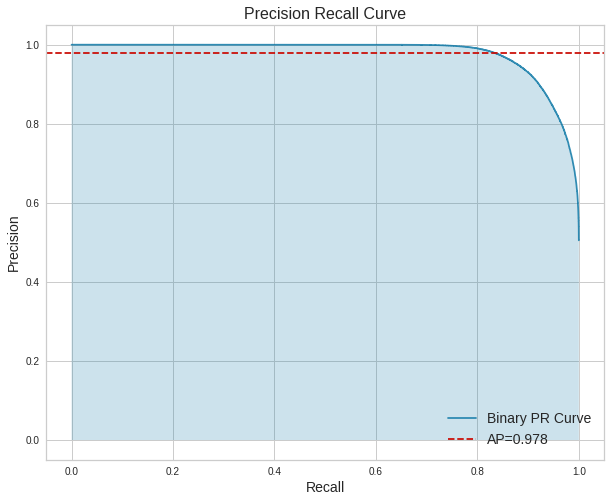

In [77]:
# Have some patience, may take some time :)
clf = XGBClassifier(max_depth = 5, n_jobs = -1, random_state = 42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# Accuracy Estimation
print('Accuracy Score (Train Data):', np.round(clf.score(X_train, y_train), decimals = 3))
print('Accuracy Score (Test Data):', np.round(clf.score(X_test, y_test), decimals = 3))

# Classification Report
XGB_report = classification_report(y_test, y_pred)
print(XGB_report)

# Precision Recall Curve
figure = plt.figure(figsize = [10, 8])
PRCurve(model = clf)
plt.show()

**Observation:**

- It can be seen that our **model accuracy has been increased to ~92% after balancing our data & applying boosting algorithm**. 
- The average **precision** comes out to be **~98%** with respect to the previous models.

## **Model Performances**

In [78]:
model_names = ['--------------------Logistic Regression---------------------\n',  
               '\n------------------Random Forest Classifier------------------\n', 
               '\n------------Extreme Gradient Boosting Classifier------------\n']
report = model_names[0] + logistic_report + model_names[1] + random_forest_report + model_names[2] + XGB_report
print(report)

--------------------Logistic Regression---------------------
              precision    recall  f1-score   support

       False       0.95      1.00      0.97    163952
        True       0.97      0.36      0.53     13477

    accuracy                           0.95    177429
   macro avg       0.96      0.68      0.75    177429
weighted avg       0.95      0.95      0.94    177429

------------------Random Forest Classifier------------------
              precision    recall  f1-score   support

       False       0.77      0.85      0.81    163952
        True       0.83      0.74      0.78    163952

    accuracy                           0.79    327904
   macro avg       0.80      0.79      0.79    327904
weighted avg       0.80      0.79      0.79    327904

------------Extreme Gradient Boosting Classifier------------
              precision    recall  f1-score   support

       False       0.88      0.96      0.92    163952
        True       0.96      0.87      0.91    163952


## **Feature Importances:**

Now that we know that **XGBoost** outperformed other models, we can check **which features** have been cateogrized as **important** learned by the **model**.

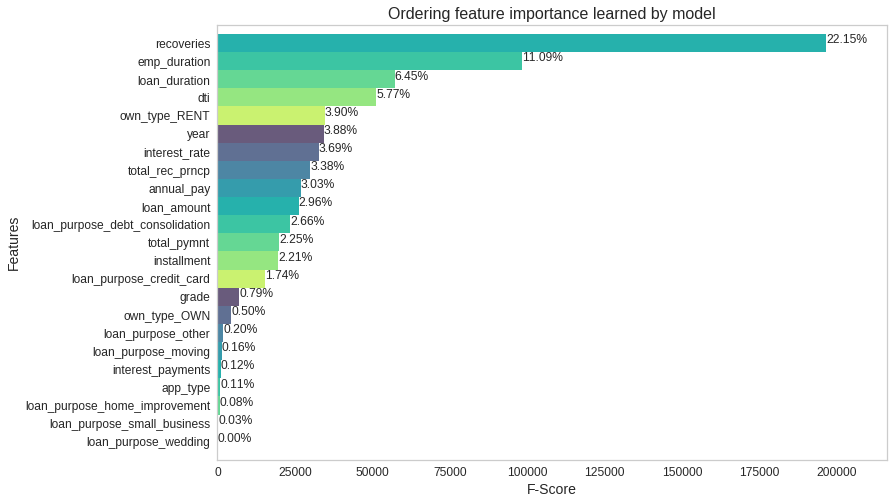

In [79]:
fig = plt.figure(figsize = [12, 8])
ax = fig.add_subplot(1, 1, 1)

colours = ['#CAF270', '#95E681', '#65D794', '#3CC5A3', '#26B1AC', '#359CAC', '#4D86A4', '#607093', '#695B7C']

ax = plot_importance(clf, height = 1, color = colours, grid = False, show_values = False, importance_type = 'cover', ax = ax)

total = data.shape[0]
for p in ax.patches:
        percentage = '{:.2f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.2
        y = p.get_y() + p.get_height() / 2
        ax.annotate(percentage, (x, y))

plt.xlabel(xlabel = 'F-Score', size = 14)
plt.ylabel(ylabel = 'Features', size = 14)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.title('Ordering feature importance learned by model', size = 16)
plt.show()

<a id = Section9></a>
# **9. Conclusion**

- We investigated in depth about the features i.e. **which features are important to retain (year, emp_duration, annual_pay, loan_amount, interest_rate, dti, total_pymnt, total_rec_prncp, recoveries, installment) and which to discard.**
- **Important feature extraction** was especially **done with the help of Random Forest** which **intrinsically performed operations** and **estimated important features** and later down by XGBoost algorithm.
- We **handled largely skewed data along with outliers using certain operations like capping and then normalizing on annual_income, interest_rate and dti features.**
- We **explored various questions** that were related to the customer being default or not.
- To **deal with highly imbalanced data, we choose an appropriate metric i.e. SMOTE** to balance our data.
- We **applied different machine learning algorithms** like Logistic Regression, Random Forest and XGBoost and **found XGBoost outperforming rest of the models**.